In [72]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # Set default font
plt.rc('figure', figsize=(10, 10))  

In [73]:

df = pd.read_csv('./shenzhen.csv')
df.head()

,Unnamed: 0,area,title,community,position,tax,total_price,unit_price,houseType,houseSize,direction,fitment
0,0,罗湖区,满五红本， 户型方正朝南，自住装修保养好，花园社区,金城华庭,螺岭,房本满五年,710.0,79552.0,3室1厅,89.25,南,精装
1,1,罗湖区,7号线洪湖站前59万平洪湖公园后京基水贝*2个万象城,洪湖东岸,翠竹,房本满五年,408.0,54736.0,3室1厅,74.54,西,精装
2,2,罗湖区,《供电南苑。复式三层四房户型》万象城，地理位置优越,供电南苑,万象城,房本满五年,850.0,67649.0,4室1厅,125.65,西,简装
3,3,罗湖区,不用明额 满两年红本 高层东南三房 有钥匙随时可看,翡翠公寓,翠竹,房本满五年,360.0,60627.0,3室2厅,59.38,南,精装
4,4,罗湖区,都市名园 2室1厅 370万,都市名园,万象城,NaN,370.0,48259.0,2室1厅,76.67,东北,简装


In [74]:
df.describe()

,Unnamed: 0,total_price,unit_price,houseSize
count,18907.000000,18907.000000,18907.000000,18907.000000
mean,9453.000000,686.988634,64893.523721,100.622215
std,5458.125105,621.063940,25713.800191,95.858442
min,0.000000,24.000000,506.000000,13.150000
25%,4726.500000,345.000000,46263.500000,66.830000
50%,9453.000000,505.000000,59441.000000,88.260000
75%,14179.500000,786.000000,78108.000000,121.065000
max,18906.000000,8800.000000,225635.000000,10871.000000


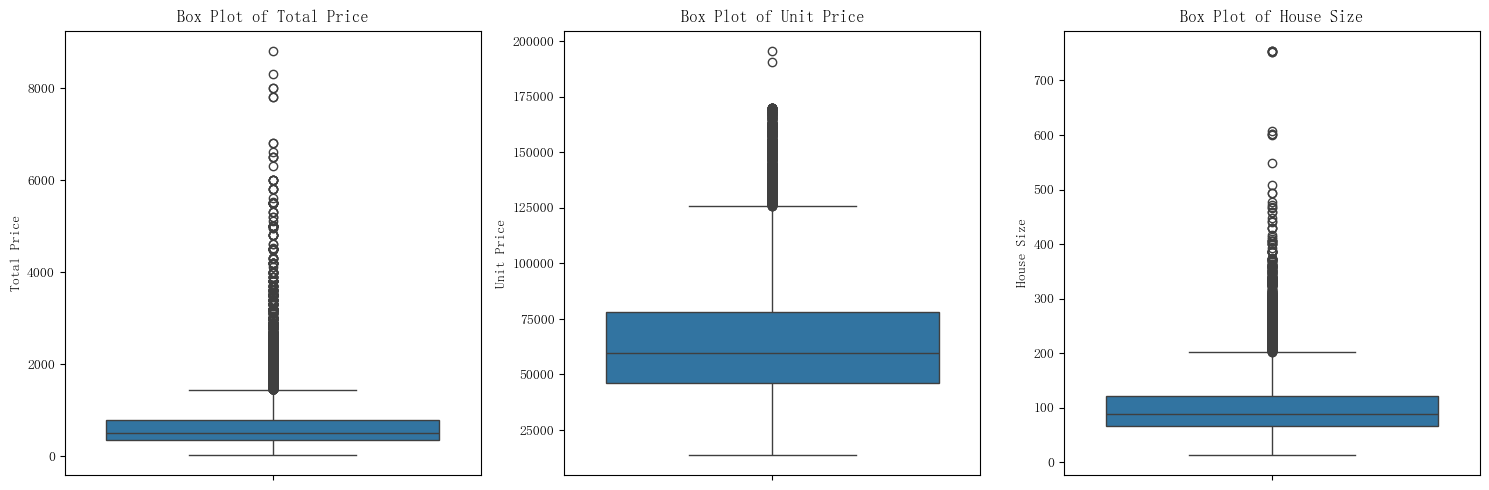

In [98]:
plt.figure(figsize=(15, 5))

# Create a box plot for total_price
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.boxplot(y=df['total_price'])
plt.title('Box Plot of Total Price')
plt.ylabel('Total Price')

# Create a box plot for unit_price
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.boxplot(y=df['unit_price'])
plt.title('Box Plot of Unit Price')
plt.ylabel('Unit Price')

# Create a box plot for houseSize
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.boxplot(y=df['houseSize'])
plt.title('Box Plot of House Size')
plt.ylabel('House Size')

# Adjust layout
plt.tight_layout()
plt.show()

In [75]:
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 Unnamed: 0       int64
area            object
title           object
community       object
position        object
tax             object
total_price    float64
unit_price     float64
houseType       object
houseSize      float64
direction       object
fitment         object
dtype: object


In [77]:
# Outliers: data with room size exceeding 10,000 square meters
df[df['houseSize']>10000]

,Unnamed: 0,area,title,community,position,tax,total_price,unit_price,houseType,houseSize,direction,fitment
12546,12546,宝安区,弘雅二期花园中间，中间楼层，满五年，红本在手,弘雅花园第二期,新安,房本满五年,550.0,506.0,3室2厅,10871.0,东南,其他


In [78]:
# outliers:unit price exceeding 200,000
df[df['unit_price']>200000]

,Unnamed: 0,area,title,community,position,tax,total_price,unit_price,houseType,houseSize,direction,fitment
1121,1121,罗湖区,优质好房，空气清新，业主诚心出售,颐园,银湖,NaN,7000.0,205009.0,5室2厅,341.45,西南,精装
3002,3002,福田区,小户型，地铁口小区，满二年，纯住宅小区,金茂礼都,华强北,NaN,720.0,225635.0,1室0厅,31.91,北,精装
7752,7752,南山区,南山深圳湾，宝能太古城北，4房，高楼层，保养好,太古城北,深圳湾,NaN,1750.0,206101.0,4室1厅,84.91,西南,精装
10187,10187,宝安区,满五年，少量欠款相当于红本在手,都市翠海华苑,新安,房本满五年,455.0,207290.0,1室1厅,21.95,西北,其他


In [79]:
# delete outliers
print(len(df))
df = df.drop(df[df['houseSize']>10000].index)
df = df.drop(df[df['unit_price']>200000].index)
print(len(df))

18907
18902


In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18902 entries, 0 to 18906
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   18902 non-null  int64  
 1   area         18902 non-null  object 
 2   title        18894 non-null  object 
 3   community    18902 non-null  object 
 4   position     18902 non-null  object 
 5   tax          10709 non-null  object 
 6   total_price  18902 non-null  float64
 7   unit_price   18902 non-null  float64
 8   hourseType   18902 non-null  object 
 9   hourseSize   18902 non-null  float64
 10  direction    18902 non-null  object 
 11  fitment      18902 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.9+ MB


In [80]:
df['tax'].unique()

array(['房本满五年', nan], dtype=object)

the title and tax columns have missing data. The title column does not need analysis. The tax column has only two unique values, which will be converted into a binary variable later in data modeling

In [81]:
df = df.drop(columns=['title'])

In [82]:
df[df.duplicated()]

,Unnamed: 0,area,community,position,tax,total_price,unit_price,houseType,houseSize,direction,fitment


In [83]:
df.head()

,Unnamed: 0,area,community,position,tax,total_price,unit_price,houseType,houseSize,direction,fitment
0,0,罗湖区,金城华庭,螺岭,房本满五年,710.0,79552.0,3室1厅,89.25,南,精装
1,1,罗湖区,洪湖东岸,翠竹,房本满五年,408.0,54736.0,3室1厅,74.54,西,精装
2,2,罗湖区,供电南苑,万象城,房本满五年,850.0,67649.0,4室1厅,125.65,西,简装
3,3,罗湖区,翡翠公寓,翠竹,房本满五年,360.0,60627.0,3室2厅,59.38,南,精装
4,4,罗湖区,都市名园,万象城,NaN,370.0,48259.0,2室1厅,76.67,东北,简装


# EDA

In [84]:
# Comparison of the number of second-hand housing listings by different area, house types, direction, and fitment(renovations).

area_house_count = df.groupby('area')['area'].count()
area_house_count.sort_values(ascending=False,inplace=True)  
# area_house_count


hourseType_count = df.groupby('houseType')['houseType'].count()
hourseType_count.sort_values(ascending=False,inplace=True)  
new_hourseType_count = hourseType_count[hourseType_count>700]
new_hourseType_count['其它'] = hourseType_count[hourseType_count<700].sum()
# new_hourseType_count


direction_count = df.groupby('direction')['direction'].count()  
new_direction_count =direction_count[direction_count>800]
new_direction_count['其它'] = direction_count[direction_count<800].sum()
new_direction_count.sort_values(ascending=False)


fitment_count = df.groupby('fitment')['fitment'].count().sort_values(ascending=False)
fitment_count.sort_values(ascending=False,inplace=True)

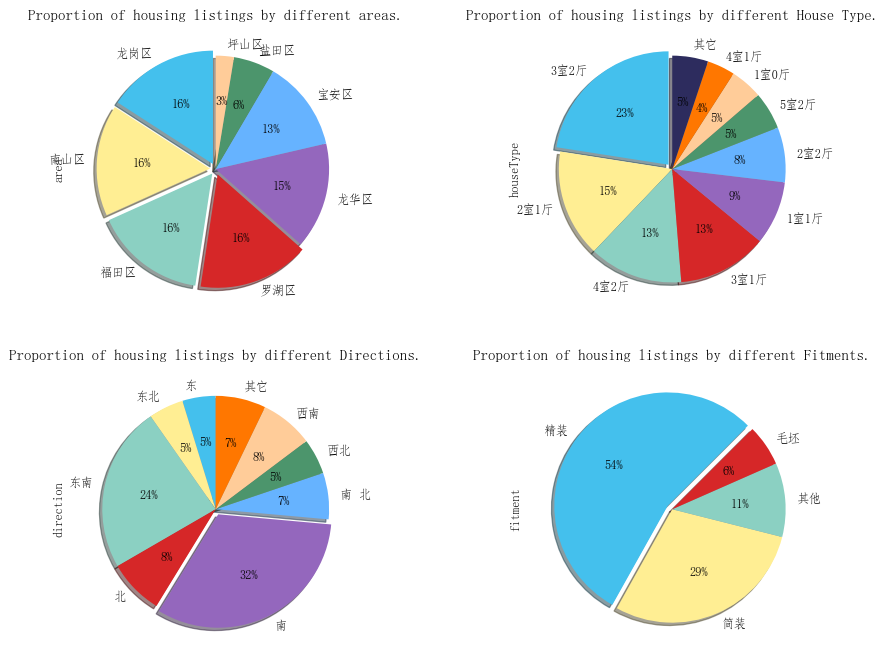

In [85]:
fig=plt.figure(figsize=(12,9),dpi=90)
ax1=fig.add_subplot(2,2,1) 
colors = ['#44c0ed', '#ffee93', '#8bd0c2', '#d62728', '#9467bd','#66b3ff', '#4c956c','#ffcc99', '#ff7700', '#2d2c5e', '#7e5d50']



plt.title("Proportion of housing listings by different areas.")
area_house_count.plot.pie(shadow=True,autopct='%0.f%%',explode=[0.05,0.05,0.05,0.05,0,0,0,0],labeldistance=1.1,startangle=90,colors=colors)

ax2=fig.add_subplot(2,2,2)
plt.title("Proportion of housing listings by different House Type.")
new_hourseType_count.plot.pie(shadow=True,autopct='%0.f%%',explode=[0.05,0,0,0,0,0,0,0,0,0],labeldistance=1.1,startangle=90,colors=colors)

ax3=fig.add_subplot(2,2,3)
plt.title("Proportion of housing listings by different Directions.")
new_direction_count.plot.pie(shadow=True,autopct='%0.f%%',explode=[0,0,0,0,0.05,0,0,0,0],labeldistance=1.1,startangle=90,colors=colors)

ax4=fig.add_subplot(2,2,4)
plt.title("Proportion of housing listings by different Fitments.")
fitment_count.plot.pie(shadow=True,autopct='%0.f%%',labeldistance=1.1,explode=[0.05,0,0,0],startangle=45,colors=colors) 
plt.show()

In [86]:
# Comparison of total prices across different areas.
area_house_mean_totalprice = df.groupby('area')['total_price'].mean()
area_house_mean_totalprice.sort_values(ascending=False,inplace=True)
area_house_mean_totalprice

area
南山区    1055.139547
宝安区     816.055401
福田区     757.029977
龙华区     687.321865
盐田区     517.372137
罗湖区     476.348483
龙岗区     474.388533
坪山区     318.978323
Name: total_price, dtype: float64

In [87]:
# Comparison of uint prices across different districts.
area_house_mean_unitprice = df.groupby('area')['unit_price'].mean()
area_house_mean_unitprice.sort_values(ascending=False,inplace=True)
area_house_mean_unitprice

area
南山区    92201.827276
福田区    76980.522841
宝安区    67769.454173
龙华区    60516.629759
罗湖区    57583.381127
盐田区    49925.460775
龙岗区    44816.287667
坪山区    35425.415133
Name: unit_price, dtype: float64

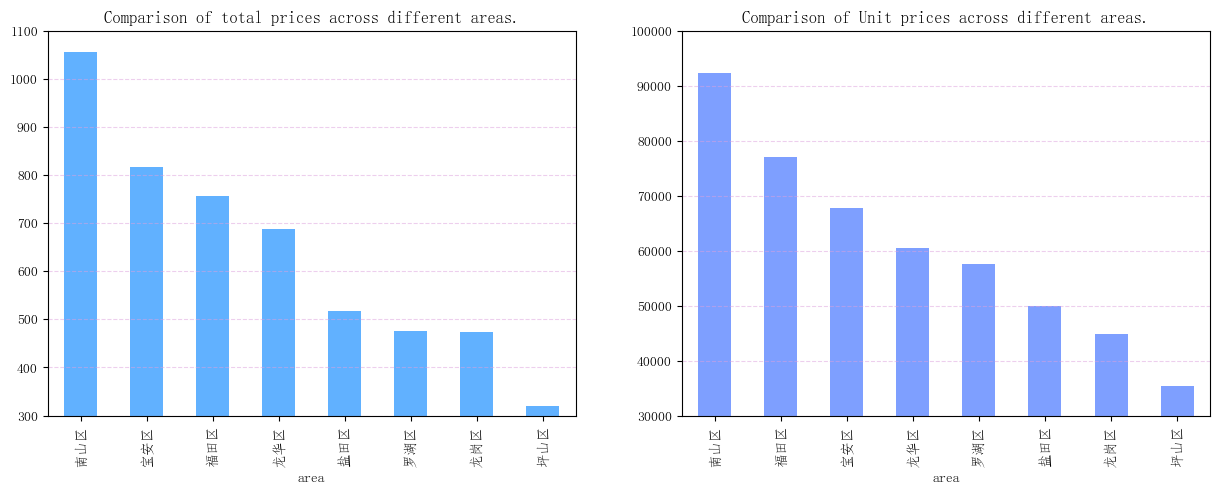

In [88]:
fig = plt.figure(figsize=(15,5),dpi=100)
ax1 = fig.add_subplot(1,2,1)
plt.title("Comparison of total prices across different areas.")
plt.ylim([300,1100])  
rects = area_house_mean_totalprice.plot.bar(alpha=0.7,color='#1E90FF')
plt.grid(alpha=0.5,color='#DDA0DD',linestyle='--',axis='y')

ax2 = fig.add_subplot(1,2,2)
plt.title("Comparison of Unit prices across different areas.")
plt.ylim([30000,100000])
area_house_mean_unitprice.plot.bar(alpha=0.7,color='#4876FF')
plt.grid(alpha=0.5,color='#DDA0DD',linestyle='--',axis='y')

plt.show()

In [89]:
total_price_rank = area_house_mean_totalprice.rank(ascending=False)
unit_price_rank = area_house_mean_unitprice.rank(ascending=False)
rank_df = pd.DataFrame({
    'Total Price Rank': total_price_rank,
    'Unit Price Rank': unit_price_rank
})

rank_df.reset_index(inplace=True)
rank_df.rename(columns={'index': 'Area'}, inplace=True)
rank_df.sort_values(by='Total Price Rank')

,area,Total Price Rank,Unit Price Rank
0,南山区,1.0,1.0
2,宝安区,2.0,3.0
4,福田区,3.0,2.0
6,龙华区,4.0,4.0
3,盐田区,5.0,6.0
5,罗湖区,6.0,5.0
7,龙岗区,7.0,7.0
1,坪山区,8.0,8.0


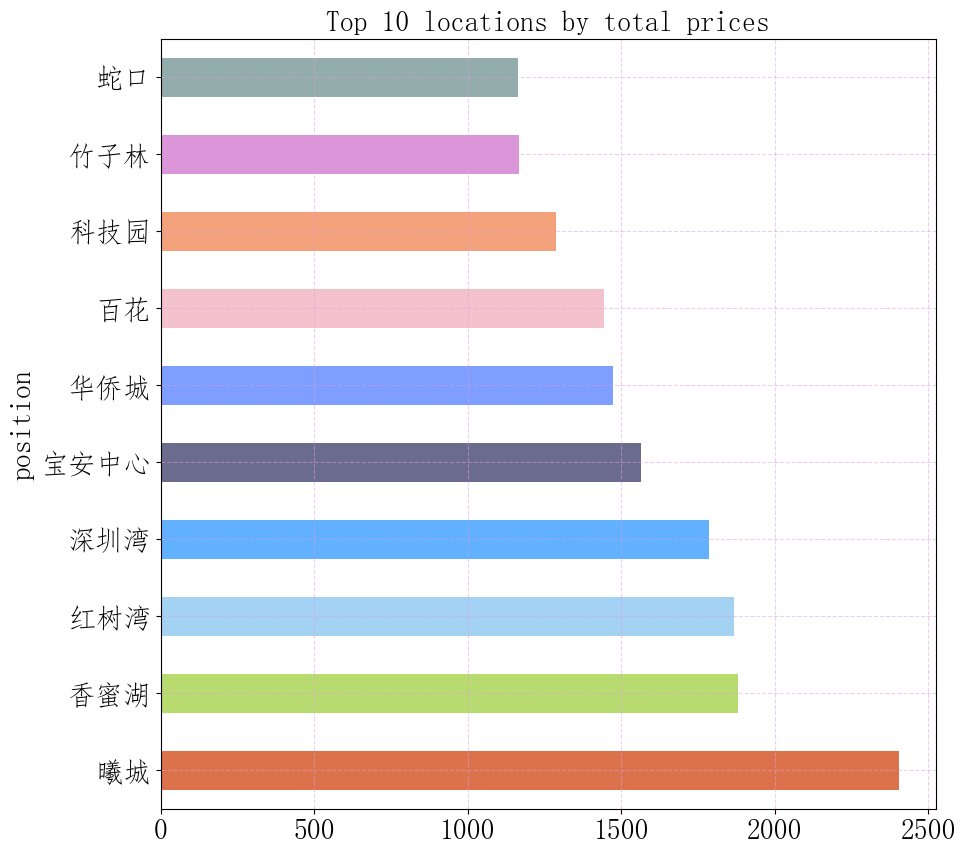

In [90]:
position_house_mean_price = df.groupby('position')['total_price'].mean()
position_house_mean_price.sort_values(ascending=False,inplace=True)



ax = plt.subplot(111)
plt.title("Top 10 locations by total prices",fontsize=20) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel(..., fontsize=20)
ax.set_ylabel(..., fontsize=20)

position_house_mean_price.head(10).plot.barh(alpha=0.7,color=[
    '#CD3700','#9ACD32','#7EC0EE','#1E90FF','#2d2c5e','#4876FF','#EEA9B8','#EE7942','#CD69C9','#668B8B'])
plt.grid(color='#DDA0DD',linestyle='--',alpha=0.5)
plt.show()

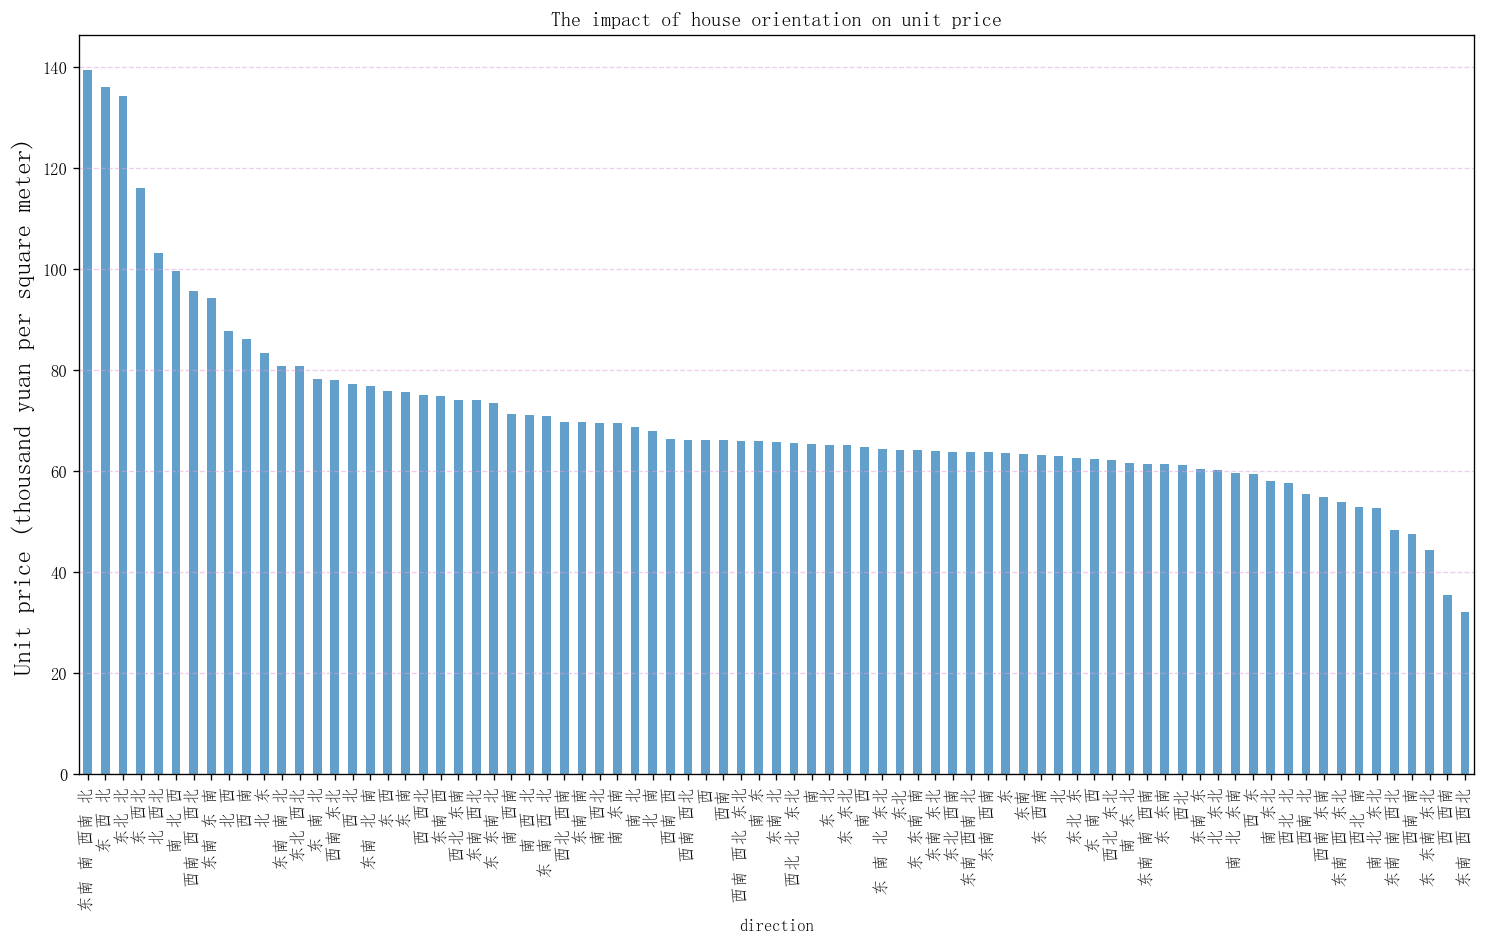

In [91]:
# The impact of house orientation on unit price
direction_unit_price = df.groupby('direction')['unit_price'].mean()/1000
direction_unit_price = direction_unit_price.sort_values(ascending=False)


plt.figure(figsize=(15,8),dpi=120)
plt.title("The impact of house orientation on unit price")
plt.ylabel("Unit price (thousand yuan per square meter)", fontsize=15)
direction_unit_price.plot.bar(alpha=0.7)
plt.grid(color='#DDA0DD',linestyle='--',alpha=0.5,axis='y')
plt.show()

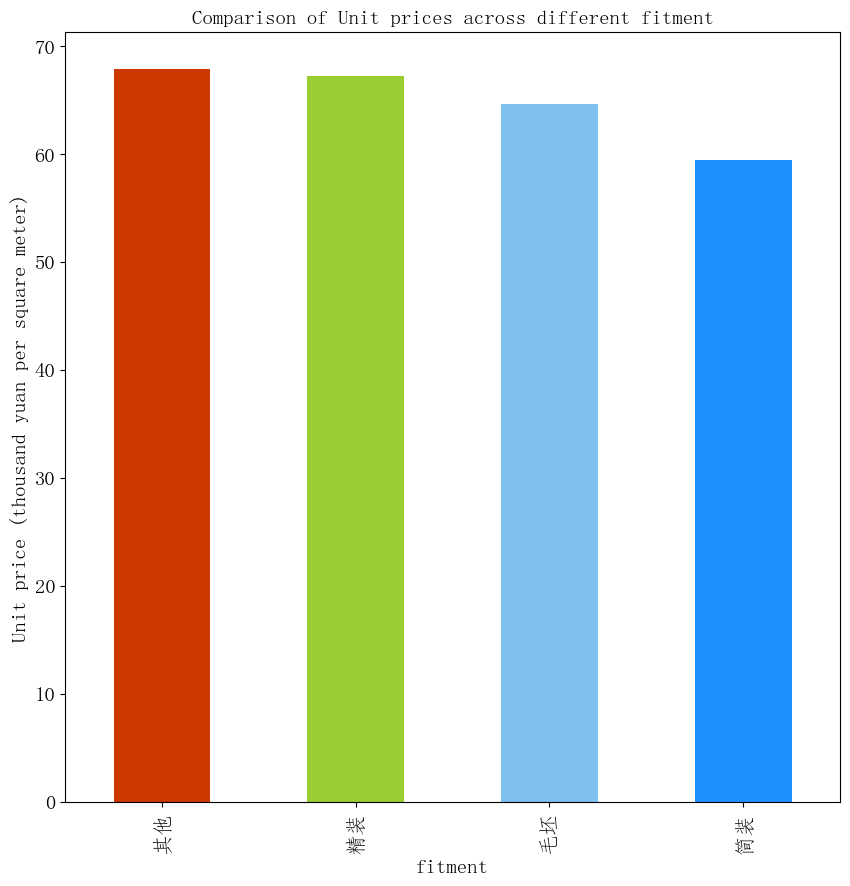

In [92]:
fit_price = df.groupby('fitment')['unit_price'].mean() / 1000
fit_price = fit_price.sort_values(ascending=False)

ax = plt.subplot(111)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel(..., fontsize=15)
ax.set_ylabel(..., fontsize=15)
plt.title("Comparison of Unit prices across different fitment", fontsize=15)
plt.ylabel("Unit price (thousand yuan per square meter)", fontsize=15)

fit_price.plot.bar(color=['#CD3700','#9ACD32','#7EC0EE','#1E90FF','#2d2c5e','#4876FF'])
plt.show()

<AxesSubplot: title={'center': 'Density analysis of room size distribution.'}, xlabel='Ellipsis', ylabel='Density'>

C:\Users\LYX\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\LYX\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


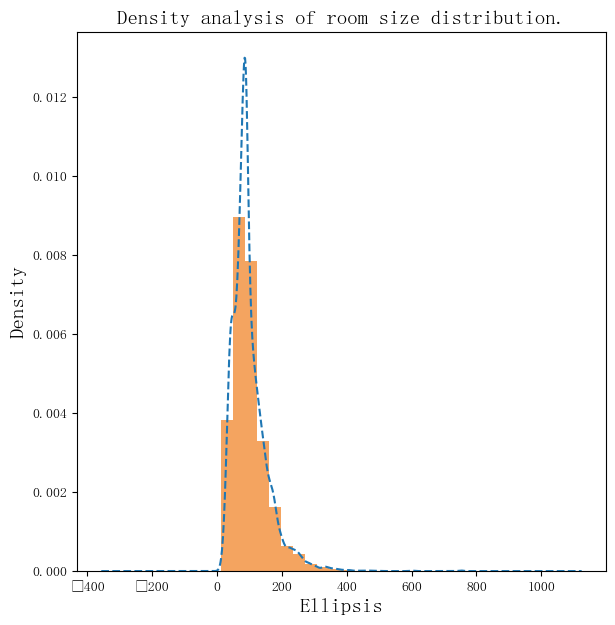

In [94]:

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel(..., fontsize=15)
ax1.set_ylabel(..., fontsize=15)

plt.title("Density analysis of room size distribution.",fontsize=15)
df['houseSize'].hist(bins=20,ax=ax1,color='#F4A460',density= True) 
df['houseSize'].plot(kind='kde',style='--',ax=ax1)  



C:\Users\LYX\AppData\Local\Temp\ipykernel_9600\4067301975.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totalprice_counts = df['total_price'].groupby(bins).count()


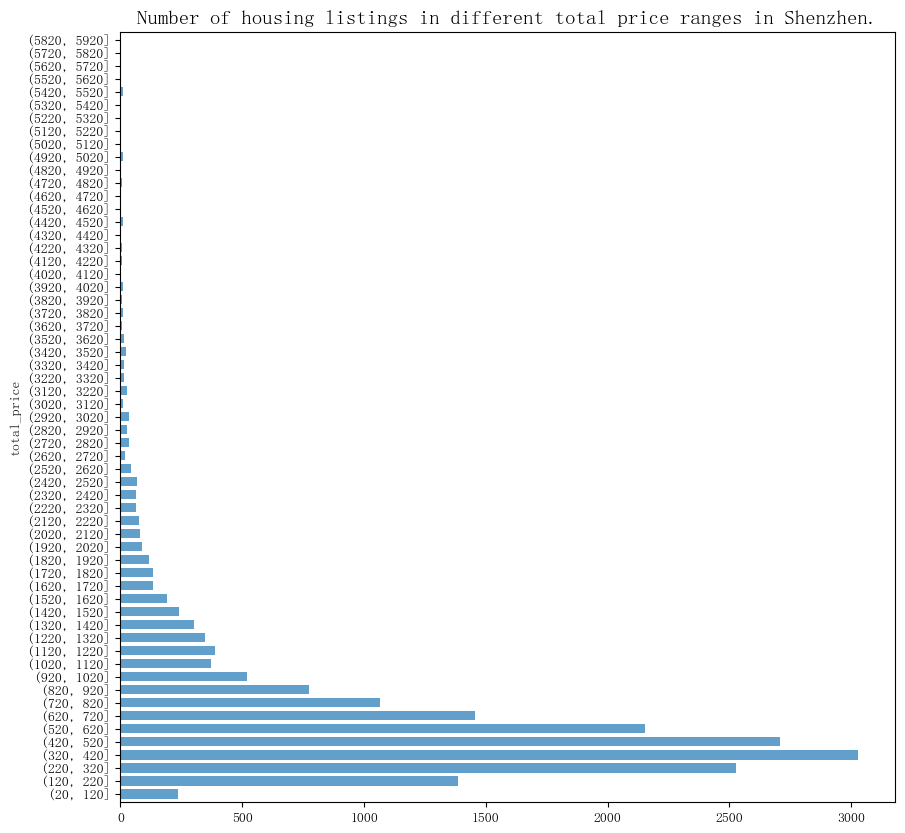

In [95]:


bins_arr = np.arange(20,6000,100)
bins = pd.cut(df['total_price'],bins_arr)
totalprice_counts = df['total_price'].groupby(bins).count()

plt.title("Number of housing listings in different total price ranges in Shenzhen.",fontsize=15)
plt.ylabel("")
totalprice_counts.plot.barh(alpha=0.7,width=0.7) 
plt.show()

<Figure size 1200x600 with 0 Axes>

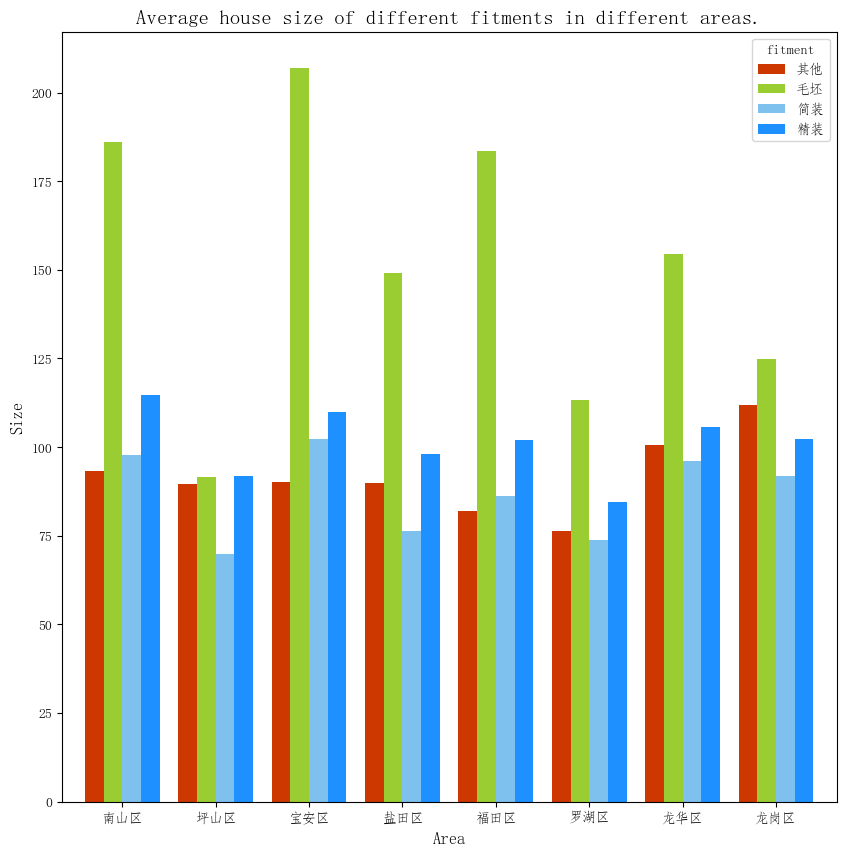

In [96]:
fit_average_size = df.groupby(['area', 'fitment'])['houseSize'].mean().unstack()

plt.figure(figsize=(12, 6))
fit_average_size.plot(kind='bar', color=['#CD3700','#9ACD32','#7EC0EE','#1E90FF','#2d2c5e','#4876FF'], width=0.8)
plt.title("Average house size of different fitments in different areas.", fontsize=15)
plt.xlabel("Area", fontsize=12)
plt.ylabel("Size", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='fitment')
plt.show()